# 0. Installing dependencies and Bring Data

In [ ]:
!pip install tensorflow pandas matplotlib sklearn kaggle

In [ ]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 99% 52.0M/52.6M [00:03<00:00, 24.2MB/s]
100% 52.6M/52.6M [00:03<00:00, 16.7MB/s]


In [10]:
!unzip jigsaw-toxic-comment-classification-challenge.zip

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           


In [12]:
!unzip  sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [13]:
!unzip  test.csv.zip 

Archive:  test.csv.zip
  inflating: test.csv                


In [14]:
!unzip  test_labels.csv.zip

Archive:  test_labels.csv.zip
  inflating: test_labels.csv         


In [15]:
!unzip  train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [11]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [18]:
df = pd.read_csv('/content/train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#1. Processing the Data

In [21]:
from tensorflow.keras.layers import TextVectorization

In [23]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [27]:
MAX_FEATURES = 200000 # number of words in the vocab

In [28]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800, output_mode='int')

In [29]:
vectorizer.adapt(X.values)

In [31]:
vectorized_text = vectorizer(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [35]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [36]:
train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [37]:
train_generator = train.as_numpy_iterator()

In [39]:
train_generator.next()

(array([[ 310,    4, 4478, ...,    0,    0,    0],
        [ 104,   12,  516, ...,    0,    0,    0],
        [   8,   69,    7, ...,    0,    0,    0],
        ...,
        [   8,   44,  390, ...,    0,    0,    0],
        [  77,   46,   65, ...,    0,    0,    0],
        [  16,    2,  401, ...,    0,    0,    0]]), array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

#2. Creating Sequential Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [45]:
model = Sequential()
model.add(Embedding(MAX_FEATURES + 1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh'))) # It is stated by tensorflow: for LSTM to be accelerated by gpu needs to have 'tanh' activation!

# Feature extractor fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Final Layer
model.add(Dense(6, activation='sigmoid'))

In [49]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [51]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 720s 102ms/step - loss: 0.0621 - val_loss: 0.0448
Epoch 2/10
6981/6981 [==============================] - 753s 108ms/step - loss: 0.0453 - val_loss: 0.0422
Epoch 3/10
6981/6981 [==============================] - 764s 109ms/step - loss: 0.0401 - val_loss: 0.0349
Epoch 4/10
6981/6981 [==============================] - 667s 96ms/step - loss: 0.0364 - val_loss: 0.0337
Epoch 5/10
6981/6981 [==============================] - 668s 96ms/step - loss: 0.0327 - val_loss: 0.0280
Epoch 6/10
6981/6981 [==============================] - 670s 96ms/step - loss: 0.0297 - val_loss: 0.0256
Epoch 7/10
6981/6981 [==============================] - 668s 96ms/step - loss: 0.0268 - val_loss: 0.0240
Epoch 8/10
6981/6981 [==============================] - 665s 95ms/step - loss: 0.0240 - val_loss: 0.0201
Epoch 9/10
6981/6981 [==============================] - 666s 95ms/step - loss: 0.0216 - val_loss: 0.0182
Epoch 10/10
6981/6981 [=============================

In [53]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

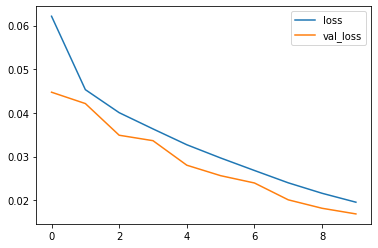

In [54]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

#3. Make Predictions

In [55]:
input_text = vectorizer('You freaking suck!')

In [56]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 700ms/step


array([[0.9995932 , 0.2632711 , 0.9956878 , 0.00951531, 0.94674546,
        0.01012398]], dtype=float32)

In [57]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [58]:
model.predict(batch_X)

1/1 [==============================] - 0s 59ms/step


array([[6.35857020e-08, 8.96410072e-26, 3.20943935e-14, 2.49596808e-15,
        2.68533204e-15, 4.53986485e-23],
       [2.15952964e-10, 8.43295886e-32, 3.79960989e-18, 1.10173995e-20,
        3.47961926e-20, 1.85091507e-31],
       [6.37886299e-10, 7.18094688e-31, 2.70977917e-17, 1.24927533e-17,
        9.81599930e-19, 3.02251208e-27],
       [1.37272809e-05, 2.26176450e-18, 6.72297995e-10, 2.08451825e-10,
        1.92567032e-10, 3.94173177e-15],
       [3.82979706e-05, 3.56895744e-16, 4.76182072e-09, 2.69099178e-08,
        3.09734660e-09, 1.13416861e-12],
       [9.99959111e-01, 4.83550550e-03, 9.99305487e-01, 7.91448613e-08,
        3.50684626e-03, 5.41215561e-09],
       [1.18820150e-04, 1.85829521e-15, 9.28991355e-08, 2.02928703e-07,
        5.97820247e-08, 1.36844314e-10],
       [6.76913994e-12, 6.98448297e-38, 8.30011121e-21, 2.43565711e-23,
        4.61046033e-23, 1.94142621e-35],
       [1.84449127e-05, 3.77830693e-17, 6.92848390e-10, 1.35564149e-09,
        3.77596482e-10, 

#4. Evaluate Model

In [59]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [60]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [62]:
for batch in test.as_numpy_iterator():
  # Unpack the batch
  X_true, y_true = batch
  # Make a prediction
  yhat = model.predict(X_true)

  #Flatten the predictions
  y_true = y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 55ms/step


In [63]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9102450609207153, Recall: 0.9126701951026917, Accuracy:0.47943830490112305


#5. Test and Gradio App

In [64]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [65]:
import gradio as gr

In [66]:
model.save('toxicity.h5')

In [67]:
model = tf.keras.models.load_model('toxicity.h5')

In [68]:
input_str = vectorizer('hey I freaken hate you, I am coming for you, I am going to hurt you')

In [69]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 1s/step


In [70]:
res

array([[9.4168943e-01, 3.9146739e-04, 2.8973561e-02, 7.6124552e-03,
        3.4794316e-02, 3.0065218e-03]], dtype=float32)

In [77]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx, col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx] > 0.5)

  return text

In [78]:
interface = gr.Interface(fn=score_comment, 
                         inputs = gr.inputs.Textbox(lines=2, placeholder='Comment to Score'),
                         outputs = 'text')

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [79]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://205476ac-96c2-4b34.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
